In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from dtree import DT
from rforest import RF
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def accuracy(y_true: np.ndarray, y_pred):
    return (y_pred==y_true).mean()

In [3]:
def read_file(file):
    df = pd.read_csv("data/" + file)
    X = df[list(df)[:-1]].to_numpy()
    y = df[list(df)[-1]].to_numpy()
    return X, y

In [4]:
def read(num):
    train_file = num + "_train.csv"
    X_train, y_train = read_file(train_file)
    
    test_file = num + "_test.csv"
    X_test, y_test = read_file(test_file)
    
    return X_train, y_train, X_test, y_test

In [5]:
best_h = {}
for i in range(1, 22):
    num = str(i) if i >= 10 else '0' + str(i)
    X_train, y_train, X_test, y_test = read(num)
    
    print("File:", num)
    for H in [1, 2, 4, 8, 12, 14]:
        tree = DT(H)
        tree.fit(X_train, y_train)
        
        result = accuracy(y_test, tree.predict(X_test))
        if result > best_h.get(num, (0, 0))[1]:
            best_h[num] = (H, result)
            print("Best H:", best_h[num][0], "Accuracy:", best_h[num][1])

print(best_h)

File: 01
Best H: 1 Accuracy: 0.3968131585710614
Best H: 2 Accuracy: 0.42456951940375226
Best H: 4 Accuracy: 0.6846569005397071
Best H: 8 Accuracy: 0.7920842970958623
Best H: 12 Accuracy: 0.8776664096633257
Best H: 14 Accuracy: 0.905165767154973
File: 02
Best H: 1 Accuracy: 0.18447837150127228
Best H: 4 Accuracy: 0.1926208651399491
File: 03
Best H: 1 Accuracy: 0.8659594985535197
Best H: 8 Accuracy: 0.9305689488910318
File: 04
Best H: 1 Accuracy: 0.5078260869565218
Best H: 2 Accuracy: 0.5220869565217391
Best H: 12 Accuracy: 0.5641739130434783
File: 05
Best H: 1 Accuracy: 0.922077922077922
Best H: 4 Accuracy: 0.961038961038961
File: 06
Best H: 1 Accuracy: 0.5905077262693157
Best H: 4 Accuracy: 0.6214128035320088
Best H: 12 Accuracy: 0.6578366445916115
Best H: 14 Accuracy: 0.7461368653421634
File: 07
Best H: 1 Accuracy: 0.3851162790697674
Best H: 2 Accuracy: 0.4013953488372093
Best H: 8 Accuracy: 0.4720930232558139
File: 08
Best H: 1 Accuracy: 0.9708939708939709
File: 09
Best H: 1 Accuracy

In [14]:
for k, v in best_h.items():
    print("File:", k, '\t', "H:", v[0], '\t', "accuracy:", v[1])

File: 01 	 H: 14 	 accuracy: 0.905165767154973
File: 02 	 H: 4 	 accuracy: 0.1926208651399491
File: 03 	 H: 8 	 accuracy: 0.9305689488910318
File: 04 	 H: 12 	 accuracy: 0.5641739130434783
File: 05 	 H: 4 	 accuracy: 0.961038961038961
File: 06 	 H: 14 	 accuracy: 0.7461368653421634
File: 07 	 H: 8 	 accuracy: 0.4720930232558139
File: 08 	 H: 1 	 accuracy: 0.9708939708939709
File: 09 	 H: 14 	 accuracy: 0.3843137254901961
File: 10 	 H: 14 	 accuracy: 0.8253521126760563
File: 11 	 H: 14 	 accuracy: 0.9150905432595573
File: 12 	 H: 12 	 accuracy: 0.7577883805781644
File: 13 	 H: 4 	 accuracy: 0.336697247706422
File: 14 	 H: 8 	 accuracy: 0.35970667695870323
File: 15 	 H: 4 	 accuracy: 0.9615615615615616
File: 16 	 H: 12 	 accuracy: 0.6532710280373831
File: 17 	 H: 14 	 accuracy: 0.2601898380792853
File: 18 	 H: 2 	 accuracy: 0.5703648548026806
File: 19 	 H: 14 	 accuracy: 0.49362340585146286
File: 20 	 H: 12 	 accuracy: 0.8914421553090333
File: 21 	 H: 14 	 accuracy: 0.528852251109702


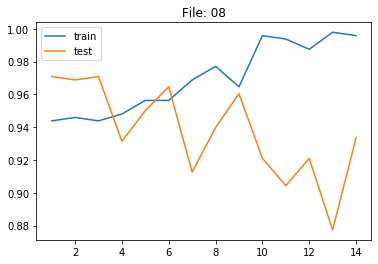

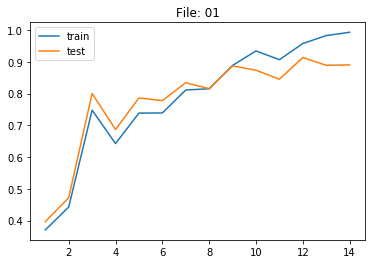

In [13]:
min_file = "01"
max_file = "01"

for k in best_h.keys():
    if best_h[min_file][0] > best_h[k][0]: min_file = k
    if best_h[max_file][0] < best_h[k][0]: max_file = k

for num in [min_file, max_file]:
    X_train, y_train, X_test, y_test = read(num)
    
    acc_test = []
    acc_train = []
    for H in range(1, 15):
        tree = DT(H)
        tree.fit(X_train, y_train)
        acc_test.append(accuracy(y_test, tree.predict(X_test)))
        acc_train.append(accuracy(y_train, tree.predict(X_train)))
        
    plt.plot(range(1, 15), acc_train, label="train")
    plt.plot(range(1, 15), acc_test, label="test")
    plt.title("File: " + num)
    plt.legend()
    plt.show()

In [15]:
rforest_results = []
for i in range(1, 22):
    num = str(i) if i >= 10 else '0' + str(i)
   
    X_train, y_train, X_test, y_test = read(num)

    print("File:", num)
    
    forest = RF()
    forest.fit(X_train, y_train)
    acc_tr = accuracy(y_train, forest.predict(X_train))
    acc_te = accuracy(y_test, forest.predict(X_test))
    
    print("Forest: train:", acc_tr, "test:", acc_te)   

    rforest_results.append((num, acc_tr, acc_te))

print()
for res in rforest_results:
    print(*res)

File: 01
Forest: train: 0.9542534052942688 test: 0.8270367514777692
File: 02
Forest: train: 0.8091603053435115 test: 0.16539440203562342
File: 03
Forest: train: 0.9657666345226615 test: 0.8587270973963356
File: 04
Forest: train: 0.9297391304347826 test: 0.6309565217391304
File: 05
Forest: train: 0.9891774891774892 test: 0.9718614718614719
File: 06
Forest: train: 0.9431567328918322 test: 0.6318984547461368
File: 07
Forest: train: 0.8874418604651163 test: 0.44976744186046513
File: 08
Forest: train: 0.9833679833679834 test: 0.9604989604989606
File: 09
Forest: train: 0.8490196078431372 test: 0.296078431372549
File: 10
Forest: train: 0.9420523138832998 test: 0.7537223340040241
File: 11
Forest: train: 0.9754527162977867 test: 0.9323943661971831
File: 12
Forest: train: 0.9385349424642155 test: 0.6817288801571709
File: 13
Forest: train: 0.8357798165137614 test: 0.20275229357798166
File: 14
Forest: train: 0.8695484368969509 test: 0.37205712080277886
File: 15
Forest: train: 0.9711711711711711 te